# Prim and dimensional stacking over 100 policies

In [1]:
import pandas as pd
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import dimensional_stacking

In [2]:
experiments = pd.read_csv('Outcomes/Experiments_from_Exploration_1000scenarios_100Policies_pf5.csv')
outcomes_total_dikerings_load_DF = pd.read_csv('Outcomes/Proccesed_basecase_fully_aggregated_100000scenarios_pf5.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [9]:
experiments = experiments.iloc[:,1:17]

In [10]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail
0,126.0,223.622426,1.0,0.871722,218.831042,1.0,0.705490,237.027027,10.0,0.852197,122.745031,10.0,0.276320,133.842486,1.0,0.177182
1,79.0,298.108524,1.0,0.100861,232.253542,1.0,0.104278,33.997448,1.5,0.316080,134.287863,1.0,0.254493,206.265410,1.5,0.926149
2,80.0,275.541284,10.0,0.200497,229.990714,1.5,0.055838,114.045936,1.5,0.031793,305.444359,1.5,0.620158,222.904181,1.5,0.273655
3,15.0,200.546816,1.0,0.000321,281.785818,1.0,0.018157,162.548088,1.0,0.153352,262.402559,10.0,0.977910,226.391822,1.0,0.277829
4,120.0,312.688358,1.5,0.202780,334.804942,1.5,0.047327,178.394116,1.5,0.513973,74.210712,1.5,0.565032,199.306059,1.5,0.960193


## Deaths

In this section analysis are performed on the simulated number of deaths by the dike_function.py model

### Total deaths in dikering 5

In [11]:
data = outcomes_total_dikerings_load_DF['A.5_Total Expected Number of Deaths']

#five times smaller than desirable risk by Dutch government:
#(1/100000) times citizens of Deventer (+/- 100000 in jan 2019) / 5
y = data < 1/5
#risk twenty-five times smaller than desirable risk by Dutch government (1/100000) times citizens of Deventer (+/- 100000 in jan 2019)
y5 = data < (y/5)

prim_alg = prim.Prim(experiments,y, threshold=0.8)
prim_alg5 = prim.Prim(experiments,y5, threshold=0.8)

box1 = prim_alg.find_box()
box1_5 = prim_alg5.find_box()

#### Treshold of Dutch government

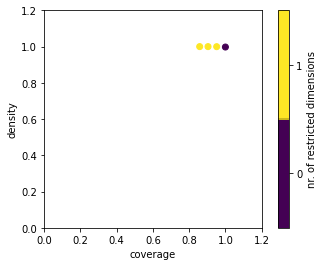

In [12]:
box1.show_tradeoff()
plt.show()

In [13]:
box1.inspect(0)

coverage          1
density     0.99761
id                0
mass              1
mean        0.99761
res_dim           0
Name: 0, dtype: object

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp values)]
Index: []



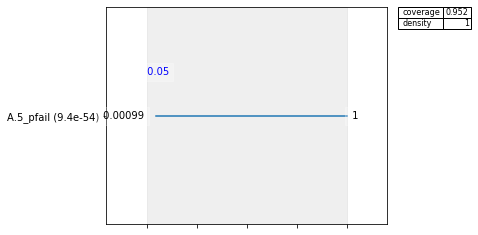

In [14]:
box1.inspect(1,style='graph')
plt.show()

In [15]:
box1.select(1)

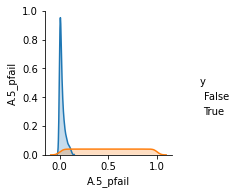

In [16]:
fig = box1.show_pairs_scatter()

Analysis: the outcomes of the model suggest that in dikering 5 causialties will remain far under the treshold of the Dutch goverment in the observed scenarios and policies when the pfail fo the dike is 0.05 or higher. Even without constrains the causilties will meet the treshold. This implies that most of the observered policies will hold under the scenarios.

#### Risk five times smaller than treshold of Dutch government

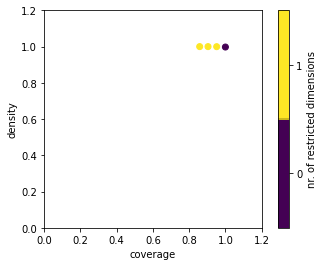

In [17]:
box1_5.show_tradeoff()
plt.show()

In [18]:
box1.inspect(1)

coverage    0.951885
density     0.999589
id                 1
mass            0.95
mean        0.999589
res_dim            1
Name: 1, dtype: object

              box 1                                         
                min       max                      qp values
A.5_pfail  0.050016  0.999385  [9.395242332143101e-54, -1.0]



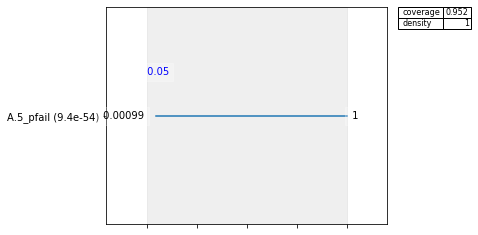

In [19]:
box1.inspect(1,style='graph')
plt.show()

Analysis: the outcomes of the model suggest that in dikering 5 causialties will remain far under the treshold of the Dutch goverment in the observed scenarios and policies when the pfail fo the dike is 0.05 or higher. Even without constrains the causilties will meet the treshold. This implies that most of the observered policies will hold under the scenarios.

#### Dimensinal stacking

c:\program files (x86)\python37-32\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


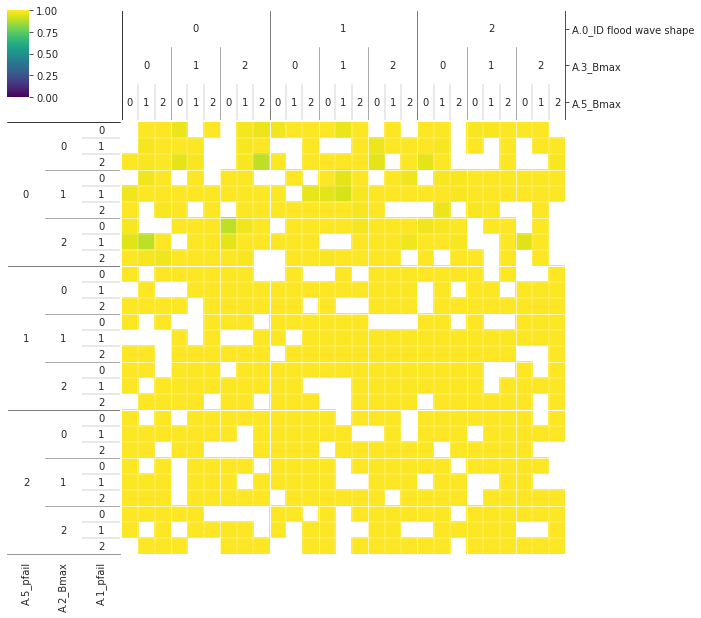

In [20]:
dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()

### Total deaths in all the dikerings

In [22]:
outcomes_total_dikerings_load_DF.head()

,Unnamed: 0,Unnamed: 0.1,A.1_Expected Total Damage,A.1_Total Dike Investment Costs,A.1_Total Expected Number of Deaths,A.2_Expected Total Damage,A.2_Total Dike Investment Costs,A.2_Total Expected Number of Deaths,A.3_Expected Total Damage,A.3_Total Dike Investment Costs,A.3_Total Expected Number of Deaths,A.4_Expected Total Damage,A.4_Total Dike Investment Costs,A.4_Total Expected Number of Deaths,A.5_Expected Total Damage,A.5_Total Dike Investment Costs,A.5_Total Expected Number of Deaths,RfR Total Costs,Total Expected Evacuation Costs,Other Areas Total Number of Deaths,Other Areas Total Dike Investment Costs,Other Areas Total Damage,Total Deaths,Expected Total Damage,Total Investment Costs
0,0,0,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,0.000000e+00,1.242050e+08,0.000000,0.0,2.416243e+07,0.0,1.018132e+06,1.342366e+08,0.000253,1.397700e+09,23.209601,0.000000,5.595331e+08,0.000000e+00,0.000253,1.018132e+06,6.937698e+08
1,1,1,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,3.036115e+06,1.242050e+08,0.001489,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,48.414519,0.001489,5.595331e+08,3.036115e+06,0.001489,3.036115e+06,6.937698e+08
2,2,2,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,1.740958e+08,1.242050e+08,0.128044,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,5057.037941,0.128044,5.595331e+08,1.740958e+08,0.128044,1.740958e+08,6.937698e+08
3,3,3,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,2.703954e+07,1.242050e+08,0.013140,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,435.421645,0.013140,5.595331e+08,2.703954e+07,0.013140,2.703954e+07,6.937698e+08
4,4,4,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,0.000000e+00,1.242050e+08,0.000000,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,0.000000,0.000000,5.595331e+08,0.000000e+00,0.000000,0.000000e+00,6.937698e+08


#### Treshold of Dutch government

In [23]:
data = outcomes_total_dikerings_load_DF['Total Deaths']

# (1/100000) * 163025: treshold of dutch government times citizens of the 5 towns/cities -> 1.6
y = data < 1.6
# risk five times smaller than desired by Dutch government
y1 = data < (y/5)


prim_alg_2 = prim.Prim(experiments,y, threshold=0.8)
prim_alg_2_1 = prim.Prim(experiments,y1, threshold=0.8)
box2 = prim_alg_2.find_box()
box2_5 = prim_alg_2_1.find_box()

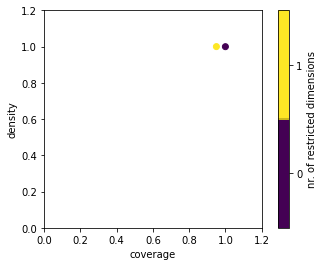

In [24]:
box2.show_tradeoff()
plt.show()

In [25]:
box2.inspect(1)

coverage    0.950371
density            1
id                 1
mass            0.95
mean               1
res_dim            1
Name: 1, dtype: object

              box 1                                         
                min       max                      qp values
A.3_pfail  0.050041  0.999575  [8.058439697118387e-17, -1.0]



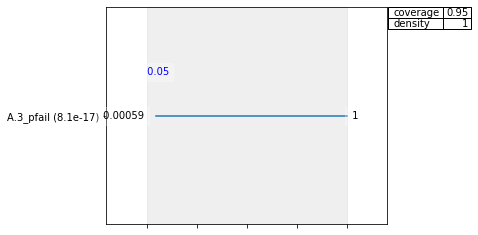

In [26]:
box2.inspect(1,style='graph')
plt.show()

In [27]:
box2.select(1)

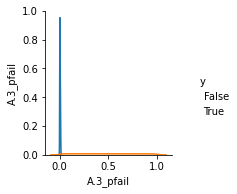

In [28]:
fig = box2.show_pairs_scatter()

Analysis: the results of the prim analysis suggest that the treshold of the Dutch government is met when the pfail of the dike in dikering 3 is higher than 0.05.

#### Risk five times smaller than treshold of Dutch government

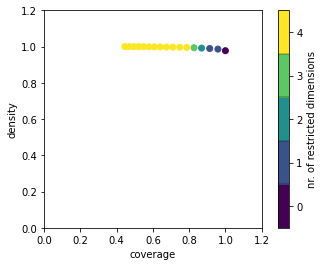

In [29]:
box2_5.show_tradeoff()
plt.show()

In [30]:
box2_5.inspect(4)

coverage    0.826855
density     0.993985
id                 4
mass           0.813
mean        0.993985
res_dim            3
Name: 4, dtype: object

              box 4                                           
                min       max                        qp values
A.3_pfail  0.097908  0.999575  [1.5003107292061505e-197, -1.0]
A.2_pfail  0.052245  0.999817   [1.3166723723045604e-15, -1.0]
A.5_pfail  0.050016  0.999385    [4.106714985867267e-13, -1.0]



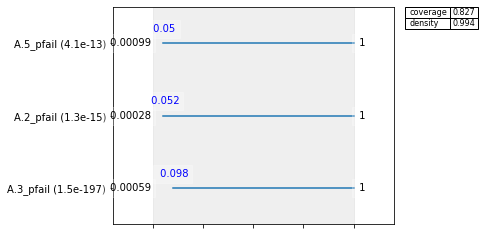

In [31]:
box2_5.inspect(4,style='graph')
plt.show()

In [32]:
box2_5.select(1)

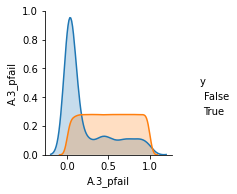

In [33]:
fig = box2_5.show_pairs_scatter()

Analysis: when the treshold is made five times smaller than used by the Dutch government, it is found that the pfail of dikerings 2,3&5 have to meet certain standards. However, these pfails minimums are very low which implies that policies can reduce the expected number of causilities.

#### Dimensional stacking

c:\program files (x86)\python37-32\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


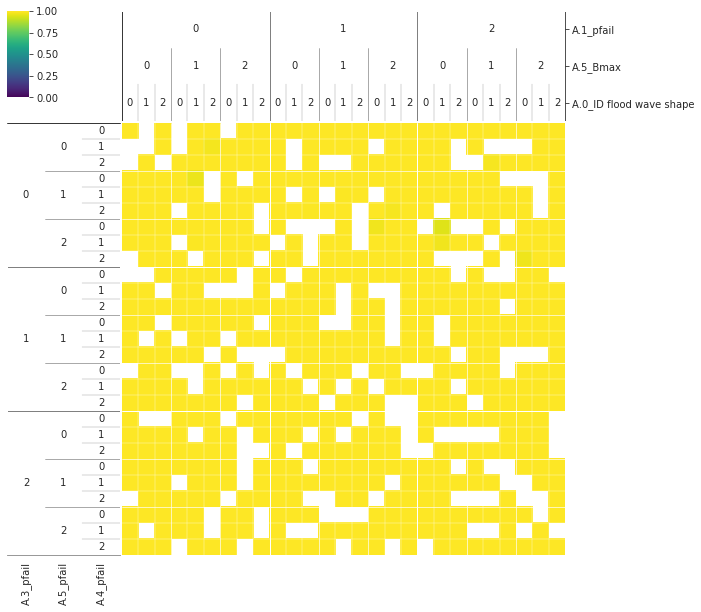

In [34]:
dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()

## Damage

In this section analysis are performed on the simulated number of deaths by the dike_function.py model

### Total damage for all dikerings

In [35]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']

<AxesSubplot:ylabel='Density'>

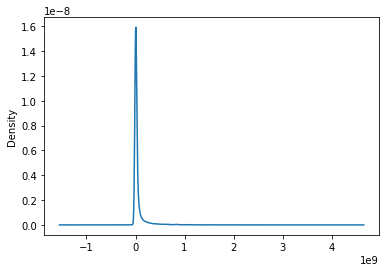

In [36]:
data.plot.kde()

In [37]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']
print(data.max())
print(data.min())
print(data.quantile(.2))

3102449551.0974674
0.0
0.0


As treshold we take 441575627.8723845 since this is the lowest 20% of the damage cases

In [38]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

#is this valid?
y = data < 2000000
#y = data > 20000000
#y = data > 242382297.91068038
prim_alg_damage = prim.Prim(experiments,y, threshold=0.8)

box_damage = prim_alg_damage.find_box()

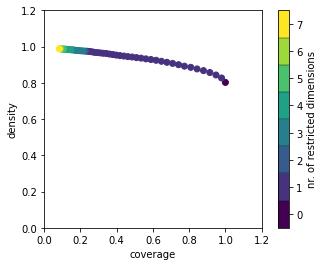

In [39]:
box_damage.show_tradeoff()
plt.show()

In [43]:
box_damage.inspect(1)

coverage    0.978925
density     0.826789
id                 1
mass            0.95
mean        0.826789
res_dim            1
Name: 1, dtype: object

              box 1                                          
                min       max                       qp values
A.5_pfail  0.050016  0.999385  [1.3739246064810368e-82, -1.0]



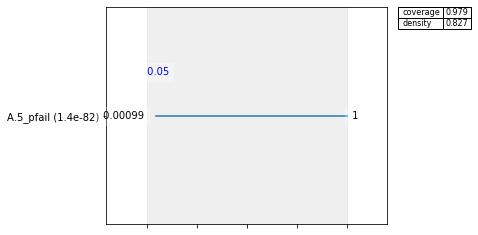

In [44]:
box_damage.inspect(1,style='graph')
plt.show()

Analysis: the total damage is minimized when the pfail of the dikering 5 is bigger than 0.05. As well the dikering increase is higher than 0.5 in both timestep 0 and 1

### Total damage dikering 5

In [45]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

<AxesSubplot:ylabel='Density'>

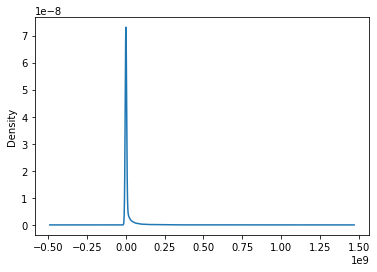

In [46]:
data.plot.kde()

In [47]:
print(data.max())
print(data.min())
print(data.quantile(.2))

980526829.3612797
0.0
0.0


In [62]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

y = data < 2000000

prim_alg_damage5 = prim.Prim(experiments,y, threshold=0.8)

box_damage5 = prim_alg_damage5.find_box()

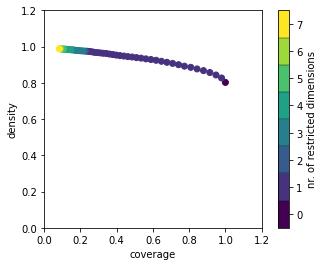

In [63]:
box_damage5.show_tradeoff()
plt.show()

In [67]:
box_damage5.inspect(50)

coverage    0.0837654
density      0.988382
id                 50
mass            0.068
mean         0.988382
res_dim             7
Name: 50, dtype: object

                            box 50              \
                               min         max   
A.2_pfail                 0.000279    0.712230   
A.4_pfail                 0.000320    0.896349   
A.5_pfail                 0.853028    0.999385   
A.4_Bmax                 70.694335  321.321020   
A.0_ID flood wave shape   3.500000  132.000000   
A.1_Bmax                 59.776813  349.983807   
A.2_Bmax                 61.231414  349.739837   

                                                                   
                                                        qp values  
A.2_pfail                            [-1.0, 0.006062131522444989]  
A.4_pfail                              [-1.0, 0.1756160199472644]  
A.5_pfail                                             [0.0, -1.0]  
A.4_Bmax                 [0.3133011132181411, 0.0943

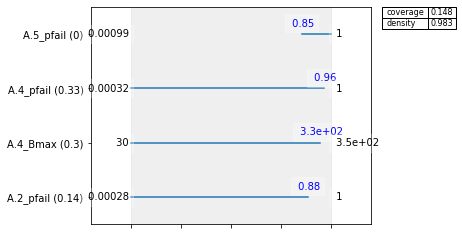

In [70]:
box_damage5.inspect(40,style='graph')
plt.show()

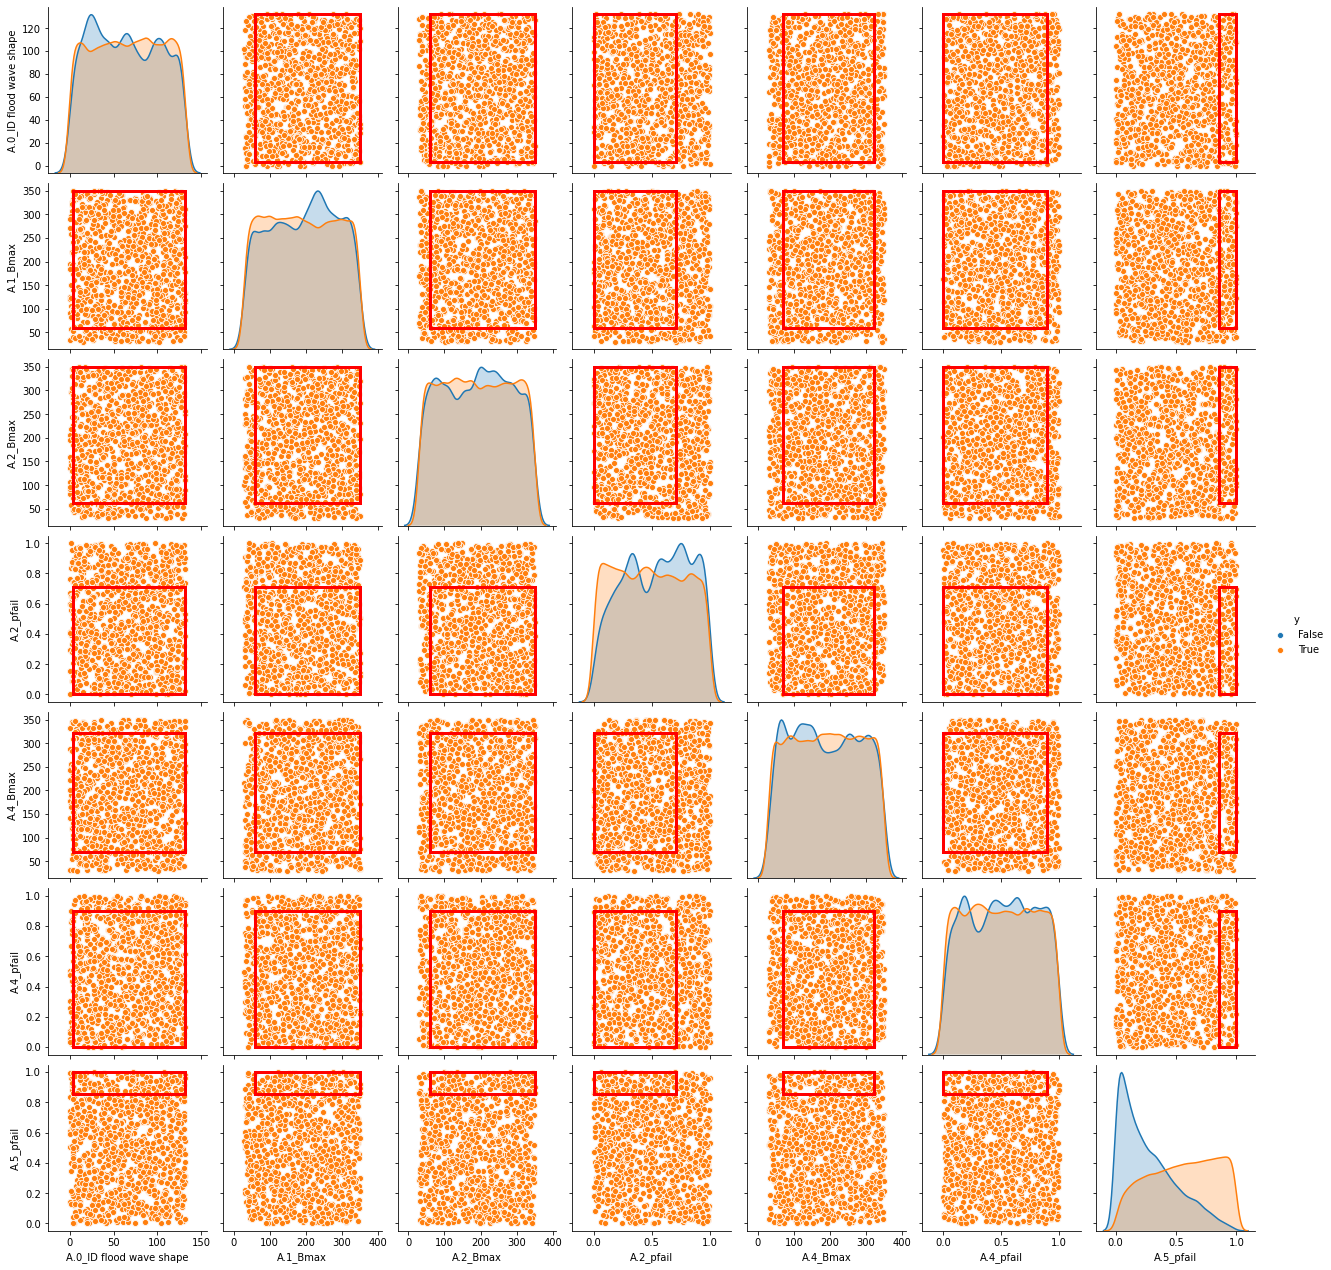

In [71]:
fig = box_damage5.show_pairs_scatter()

Analysis: it is seen that dikering 5 observes damage when dikerings 4 increasis its dikes by more than 0.5 and dikerings 5 does increase its dike by not more than 2.5. ALso the p_fail of dikering 5 has to be lower than 0.59

## Questions

- Can we use policy parameters (levers) in the prim analysis as well or should I exclude them.
- Also look to dikering 4?
